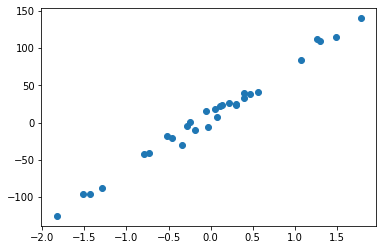

In [4]:
from sklearn.datasets import make_regression
import numpy as np
X,y = make_regression(n_samples=30, n_features=1,bias=10,noise=10)
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel="linear",C=10,epsilon=10)
regressor.fit(X,y)
regressor.epsilon

10

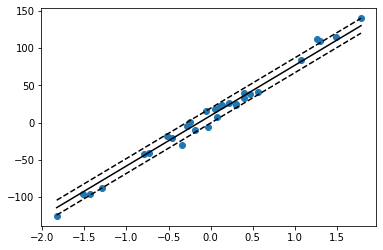

In [11]:
plotting_x = np.linspace(np.min(X),np.max(X))
pred = regressor.predict(plotting_x.reshape(-1,1))
plt.scatter(X,y)
plt.plot(plotting_x,pred,c='k')
plt.plot(plotting_x,pred+regressor.epsilon,'k--')
plt.plot(plotting_x,pred-regressor.epsilon,'k--')


In [1]:
from sklearn.datasets import load_boston

X,y = load_boston(return_X_y=True)
print(X.shape,y.shape)

(506, 13) (506,)


In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR 
import numpy as np
model = SVR(kernel="linear")
params = {"C": np.logspace(-2,1,3), "epsilon":np.logspace(-1,1,3)}
print(params)
clf = GridSearchCV(model,params,verbose=10,cv=3)
clf.fit(X_train,y_train)

{'C': array([ 0.01      ,  0.31622777, 10.        ]), 'epsilon': array([ 0.1,  1. , 10. ])}
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.01, epsilon=0.1 .............................................
[CV] ................. C=0.01, epsilon=0.1, score=0.602, total=   0.0s
[CV] C=0.01, epsilon=0.1 .............................................
[CV] ................. C=0.01, epsilon=0.1, score=0.655, total=   0.0s
[CV] C=0.01, epsilon=0.1 .............................................
[CV] ................. C=0.01, epsilon=0.1, score=0.572, total=   0.0s
[CV] C=0.01, epsilon=1.0 .............................................
[CV] ................. C=0.01, epsilon=1.0, score=0.605, total=   0.0s
[CV] C=0.01, epsilon=1.0 .............................................
[CV] ................. C=0.01, epsilon=1.0, score=0.646, total=   0.0s
[CV] C=0.01, epsilon=1.0 .............................................
[CV] ................. C=0.01, epsilon=1.0, score=0.586, total=   0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV] .. C=0.31622776601683794, epsilon=0.1, score=0.728, total=   0.4s
[CV] C=0.31622776601683794, epsilon=0.1 ..............................
[CV] .. C=0.31622776601683794, epsilon=0.1, score=0.702, total=   0.6s
[CV] C=0.31622776601683794, epsilon=0.1 ..............................
[CV] .. C=0.31622776601683794, epsilon=0.1, score=0.696, total=   0.6s
[CV] C=0.31622776601683794, epsilon=1.0 ..............................
[CV] .. C=0.31622776601683794, epsilon=1.0, score=0.722, total=   0.4s
[CV] C=0.31622776601683794, epsilon=1.0 ..............................
[CV] .. C=0.31622776601683794, epsilon=1.0, score=0.702, total=   0.3s
[CV] C=0.31622776601683794, epsilon=1.0 ..............................
[CV] .. C=0.31622776601683794, epsilon=1.0, score=0.697, total=   0.7s
[CV] C=0.31622776601683794, epsilon=10.0 .............................
[CV] . C=0.31622776601683794, epsilon=10.0, score=0.541, total=   0.0s
[CV] C=0.31622776601683794, epsilon=10.0 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 0.01      ,  0.31622777, 10.        ]),
                         'epsilon': array([ 0.1,  1. , 10. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [7]:
clf.best_estimator_

SVR(C=0.31622776601683794, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='scale', kernel='linear', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
print(clf.best_score_)
print(clf.score(X_test,y_test))

0.7085584792668689
0.6254774875980119


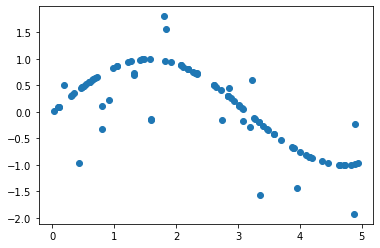

In [16]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(100, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

#X_plot = np.linspace(0, 5, 100000)[:, None]

plt.scatter(X,y)#[:100,:],y[:100])


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR 
import numpy as np
model = SVR(kernel="linear")
params = {"C": np.logspace(-2,1,3), "epsilon":np.logspace(-1,1,3)}
print(params)
clf = GridSearchCV(model,params,verbose=10,cv=3)
clf.fit(X,y)

{'C': array([ 0.01      ,  0.31622777, 10.        ]), 'epsilon': array([ 0.1,  1. , 10. ])}
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.01, epsilon=0.1 .............................................
[CV] ................. C=0.01, epsilon=0.1, score=0.353, total=   0.0s
[CV] C=0.01, epsilon=0.1 .............................................
[CV] ................. C=0.01, epsilon=0.1, score=0.281, total=   0.0s
[CV] C=0.01, epsilon=0.1 .............................................
[CV] ................. C=0.01, epsilon=0.1, score=0.484, total=   0.0s
[CV] C=0.01, epsilon=1.0 .............................................
[CV] ................. C=0.01, epsilon=1.0, score=0.095, total=   0.0s
[CV] C=0.01, epsilon=1.0 .............................................
[CV] ................ C=0.01, epsilon=1.0, score=-0.110, total=   0.0s
[CV] C=0.01, epsilon=1.0 .............................................
[CV] ................. C=0.01, epsilon=1.0, score=0.063, total=   0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 0.01      ,  0.31622777, 10.        ]),
                         'epsilon': array([ 0.1,  1. , 10. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

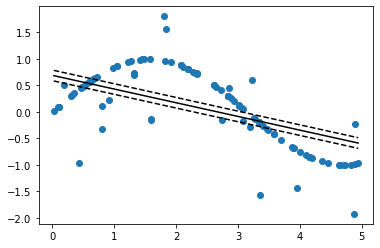

In [18]:
plotting_x = np.linspace(np.min(X),np.max(X))
pred = clf.predict(plotting_x.reshape((-1,1)))
plt.scatter(X,y)
plt.plot(plotting_x,pred,c='k')
plt.plot(plotting_x,pred+clf.best_params_["epsilon"],'k--')
plt.plot(plotting_x,pred-clf.best_params_["epsilon"],'k--')